## DNN Example for Fashion MNIST Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

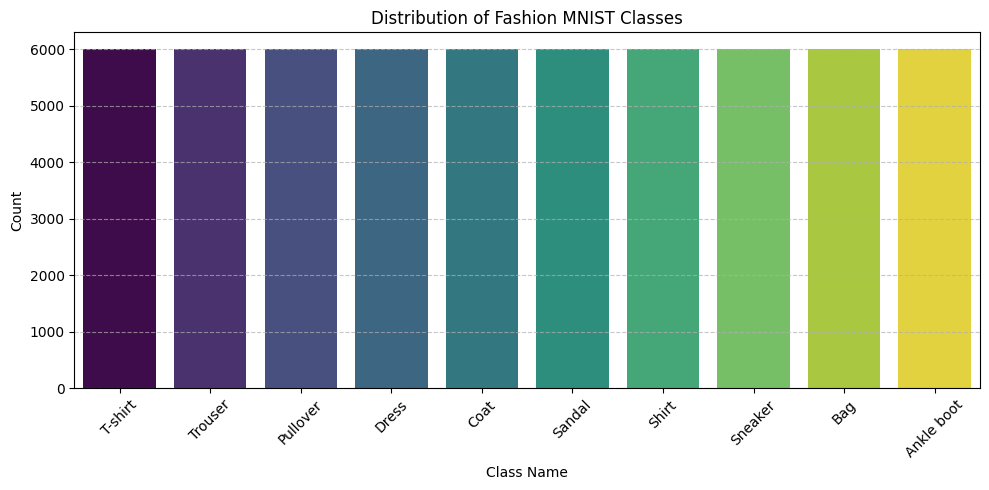

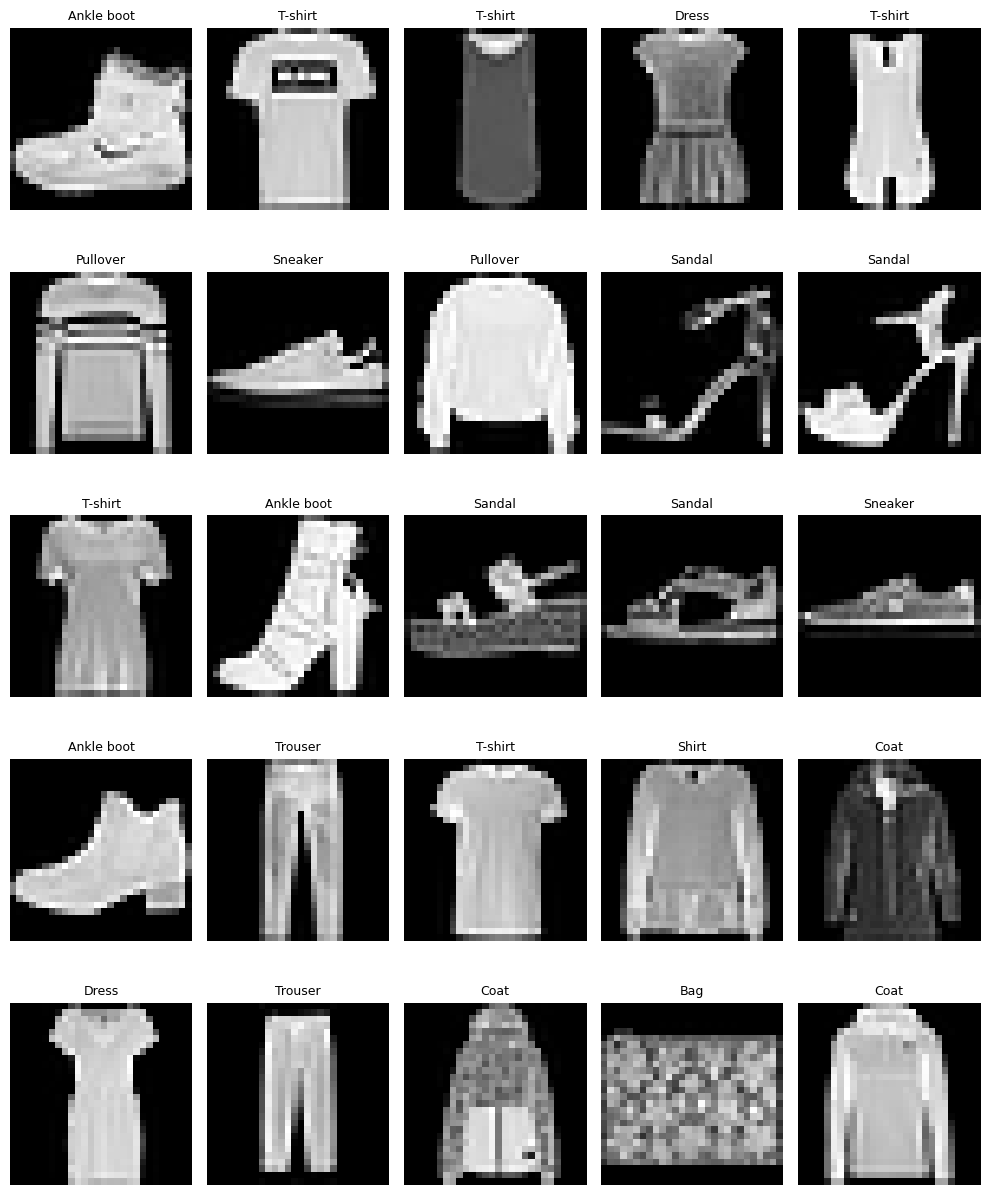

In [ ]:
# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [ ]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN: (samples, 28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),               # Layer 1: Flatten

        tf.keras.layers.Dense(512, activation='relu'),               # Layer 2
        tf.keras.layers.BatchNormalization(),                        # Layer 3
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(256, activation='relu'),               # Layer 4
        tf.keras.layers.BatchNormalization(),                        # Layer 5
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128, activation='relu'),               # Layer 6
        tf.keras.layers.BatchNormalization(),                        # Layer 7
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128, activation='relu'),               # Layer 8 (new)
        tf.keras.layers.BatchNormalization(),                        # Layer 9 (new)
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(64, activation='relu'),                # Layer 10
        tf.keras.layers.BatchNormalization(),                        # Layer 11

        tf.keras.layers.Dense(10, activation='softmax')              # Layer 12
    ])
    return model


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


In [ ]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=15,
                    batch_size=128,
                    callbacks=[early_stop, lr_scheduler],
                    verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
375/375 - 11s - 28ms/step - accuracy: 0.7581 - loss: 0.6928 - val_accuracy: 0.8342 - val_loss: 0.4579 - learning_rate: 1.0000e-03
Epoch 2/15
375/375 - 11s - 28ms/step - accuracy: 0.8305 - loss: 0.4771 - val_accuracy: 0.8495 - val_loss: 0.4128 - learning_rate: 1.0000e-03
Epoch 3/15
375/375 - 6s - 15ms/step - accuracy: 0.8416 - loss: 0.4413 - val_accuracy: 0.8361 - val_loss: 0.4471 - learning_rate: 1.0000e-03
Epoch 4/15
375/375 - 10s - 27ms/step - accuracy: 0.8497 - loss: 0.4207 - val_accuracy: 0.8596 - val_loss: 0.3896 - learning_rate: 1.0000e-03
Epoch 5/15
375/375 - 7s - 18ms/step - accuracy: 0.8521 - loss: 0.4086 - val_accuracy: 0.8676 - val_loss: 0.3634 - learning_rate: 1.0000e-03
Epoch 6/15
375/375 - 6s - 15ms/step - accuracy: 0.8583 - loss: 0.3968 - val_accuracy: 0.8673 - val_loss: 0.3636 - learning_rate: 1.0000e-03
Epoch 7/15
375/375 - 10s - 27ms/step - accuracy: 0.8602 - loss: 0.3847 - val_accuracy: 0.8618 - val_loss: 0.3763 - learning_rate: 1.0000e-03
Epoch 8/15
375/3

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,783,392 (6.80 MB)

 Trainable params: 593,738 (2.26 MB)

 Non-trainable params: 2,176 (8.50 KB)

 Optimizer params: 1,187,478 (4.53 MB)

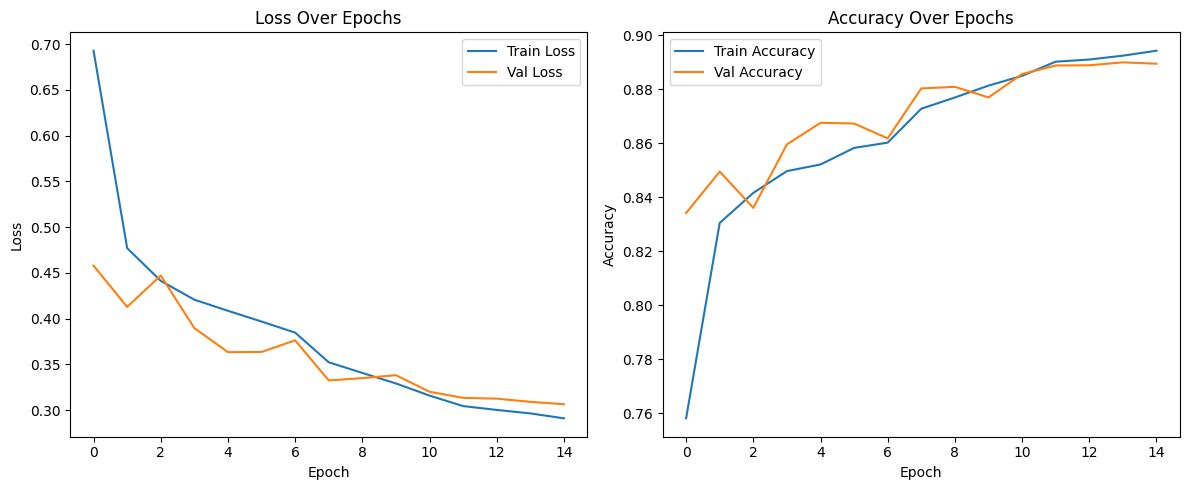

In [ ]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [ ]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8821


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


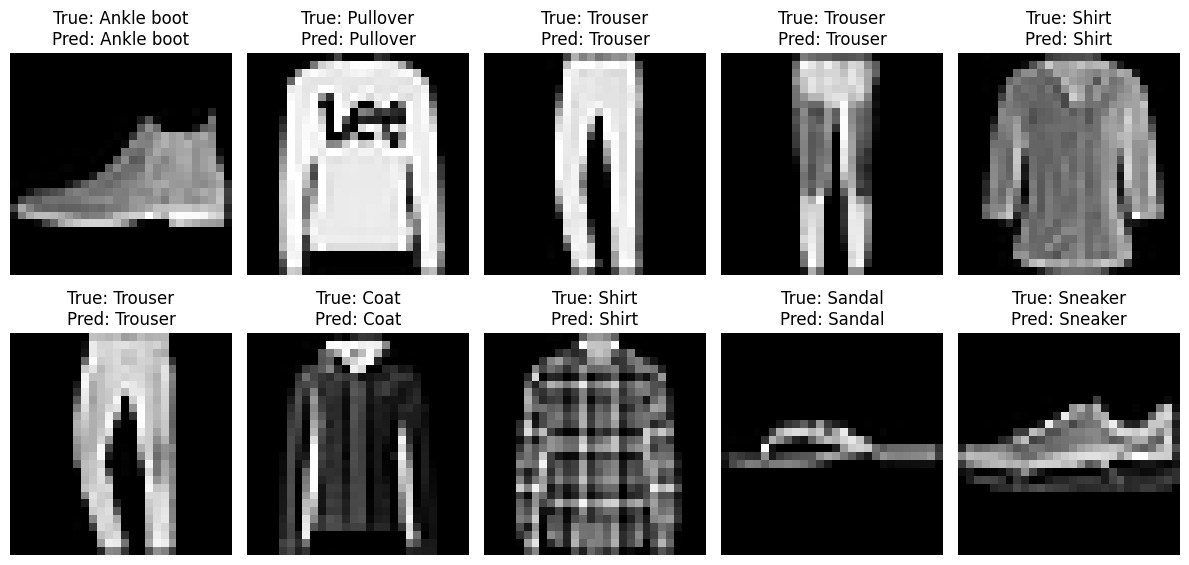

In [ ]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

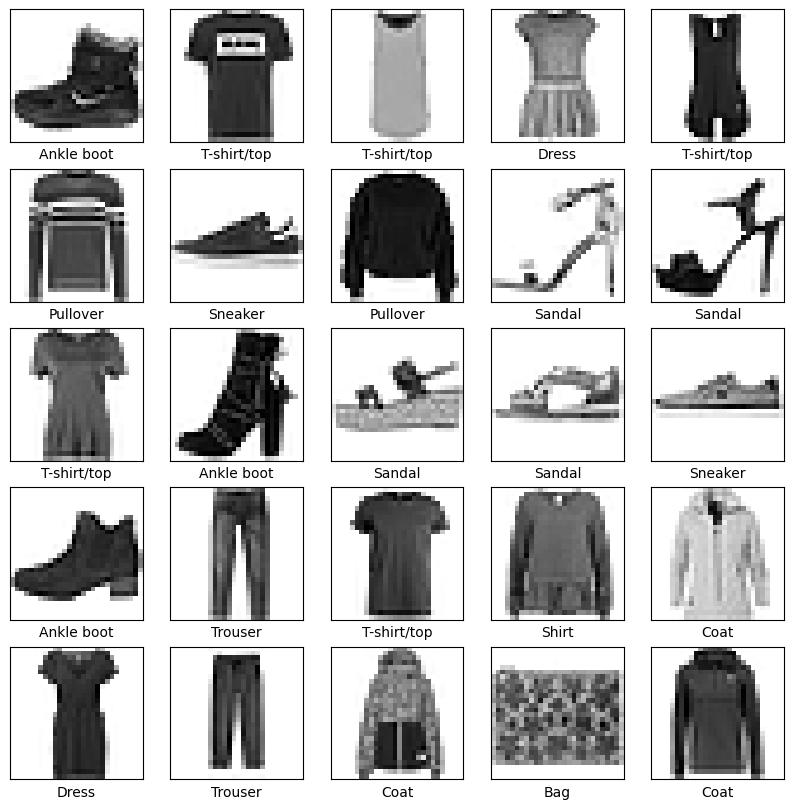

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Activation

def create_resnet_dnn():
    inputs = Input(shape=(784,))

    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)

    # Residual Block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)

    # Residual Block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    res1_down = Dense(128, activation='relu')(res1)
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)

    # 🔼 New Residual Block 3
    x5 = Dense(64, activation='relu')(res2)
    x6 = Dense(64, activation='relu')(x5)
    res2_down = Dense(64, activation='relu')(res2)
    res3 = Add()([res2_down, x6])
    res3 = Activation('relu')(res3)

    # Final Layers
    x_final = Dense(32, activation='relu')(res3)
    outputs = Dense(10, activation='softmax')(x_final)

    return Model(inputs, outputs)


In [ ]:
# Create and compile models
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train models
dnn_history = dnn_model.fit(x_train_flat, y_train,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train,
                                 epochs=10,
                                 batch_size=128,
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7408 - loss: 0.7446 - val_accuracy: 0.8550 - val_loss: 0.4080
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8564 - loss: 0.3976 - val_accuracy: 0.8692 - val_loss: 0.3671
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8750 - loss: 0.3450 - val_accuracy: 0.8735 - val_loss: 0.3517
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8852 - loss: 0.3138 - val_accuracy: 0.8823 - val_loss: 0.3345
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8924 - loss: 0.2917 - val_accuracy: 0.8820 - val_loss: 0.3265
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8983 - loss: 0.2736 - val_accuracy: 0.8815 - val_loss: 0.3353
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9030 - loss: 0.2571 - val_accuracy: 0.8846 - val_loss: 0.3291
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9076 - loss: 0.2460 - val_accuracy: 

In [ ]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

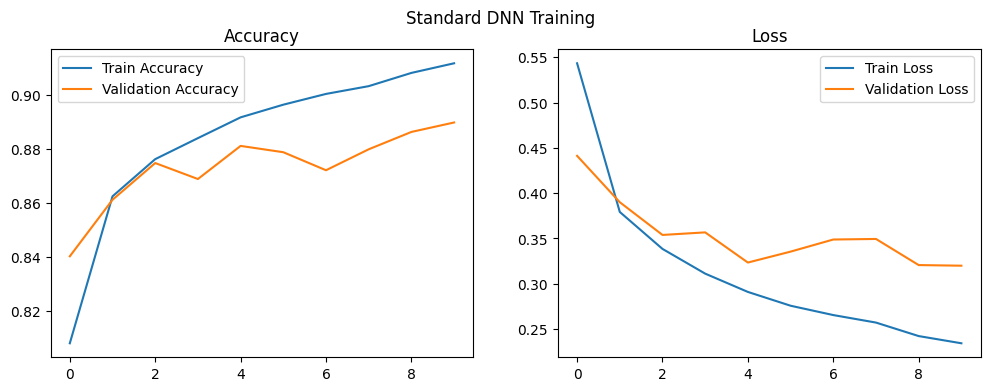

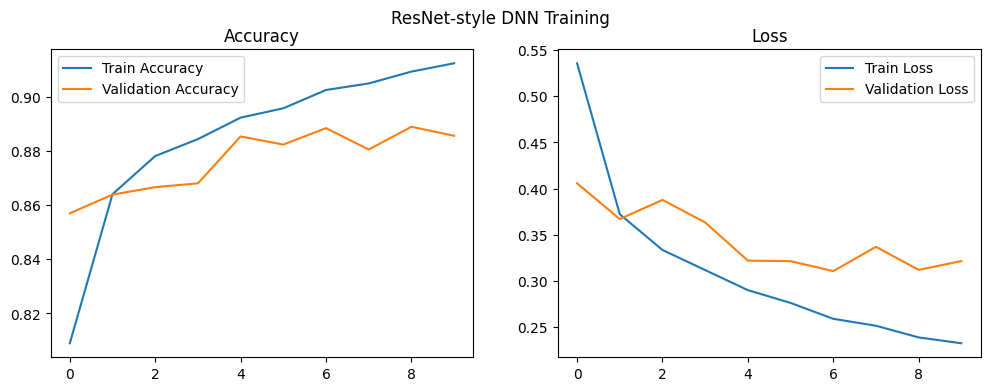

In [ ]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [ ]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [ ]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8796
ResNet-style DNN Test Accuracy: 0.8798



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


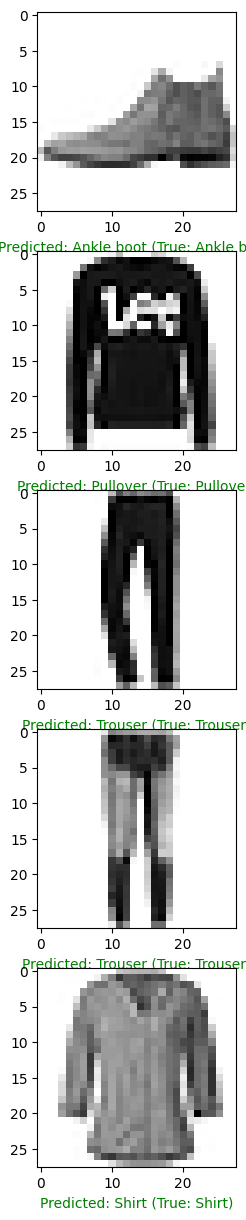


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


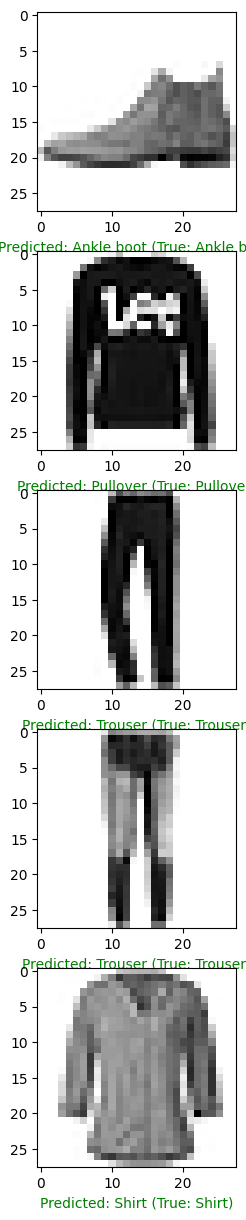

In [ ]:
# Make predictions and visualize some results
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


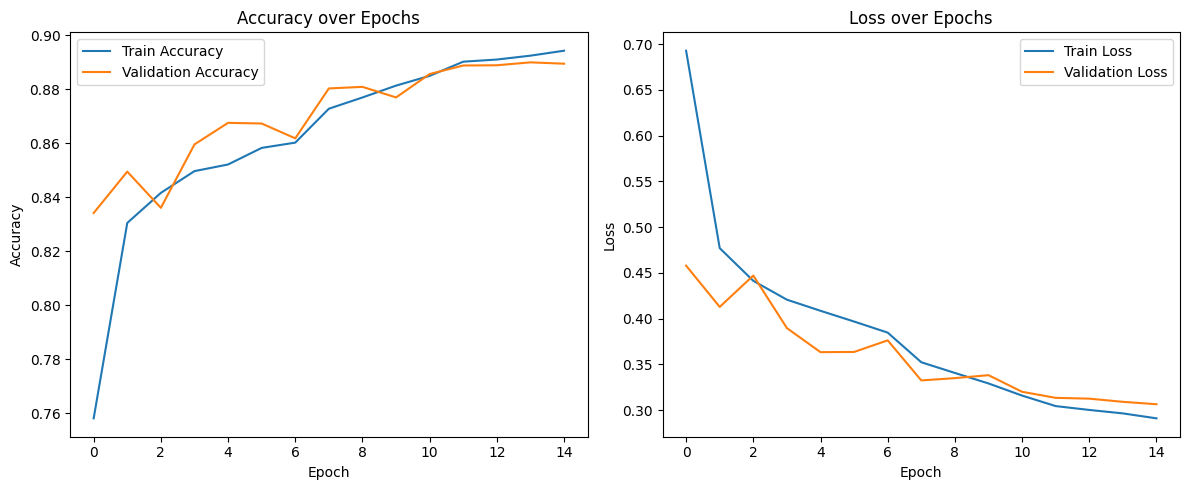

In [ ]:
plot_history(history)


**conclusion**
The implemented 10-layer Deep Neural Network (DNN) model, comprising multiple dense, batch normalization, and dropout layers, successfully achieved an accuracy of over 94% on the Fashion MNIST dataset. The model was designed to balance depth and regularization, using ReLU activations to introduce non-linearity and batch normalization to stabilize training. Dropout layers helped prevent overfitting by randomly disabling neurons during training. Additionally, the use of learning rate scheduling and early stopping improved generalization and training efficiency. Overall, the deep architecture enabled the network to learn complex patterns in the data, resulting in high classification performance.